In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [13]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [4]:
model = myCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.5)

In [5]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

In [6]:
train_losses = []
test_losses = []
test_accuracies = []

In [7]:
# 훈련 함수
def train(model, train_loader, optimizer, epoch):
  model.train()
  train_loss = 0
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    train_loss += loss.item()
    optimizer.step()

  # 평균 훈련 손실 계산
  train_loss /= len(train_loader)
  train_losses.append(train_loss)
  print(f'epoch {epoch}, Training Loss: {train_loss : .4f}')

# 훈련 함수
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    # 평균 훈련 손실 계산
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # 정확도 계산
    accuracy = 100. * correct / total
    print(f'epoch {epoch}, Training Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')

In [8]:
# 모델 평가
def test(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
      for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  accuracy = 100. * correct / len(test_loader.dataset)
  test_losses.append(test_loss)
  test_accuracies.append(accuracy)
  print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

In [9]:
for epoch in range(1, 11):
  train(model, train_loader, optimizer, epoch)
  test(model, test_loader)

epoch 1, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 2, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 3, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 4, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 5, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 6, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 7, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 8, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 9, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%
epoch 10, Training Loss:  2.3044
Test Loss: 2.3050, Accuracy: 10.60%


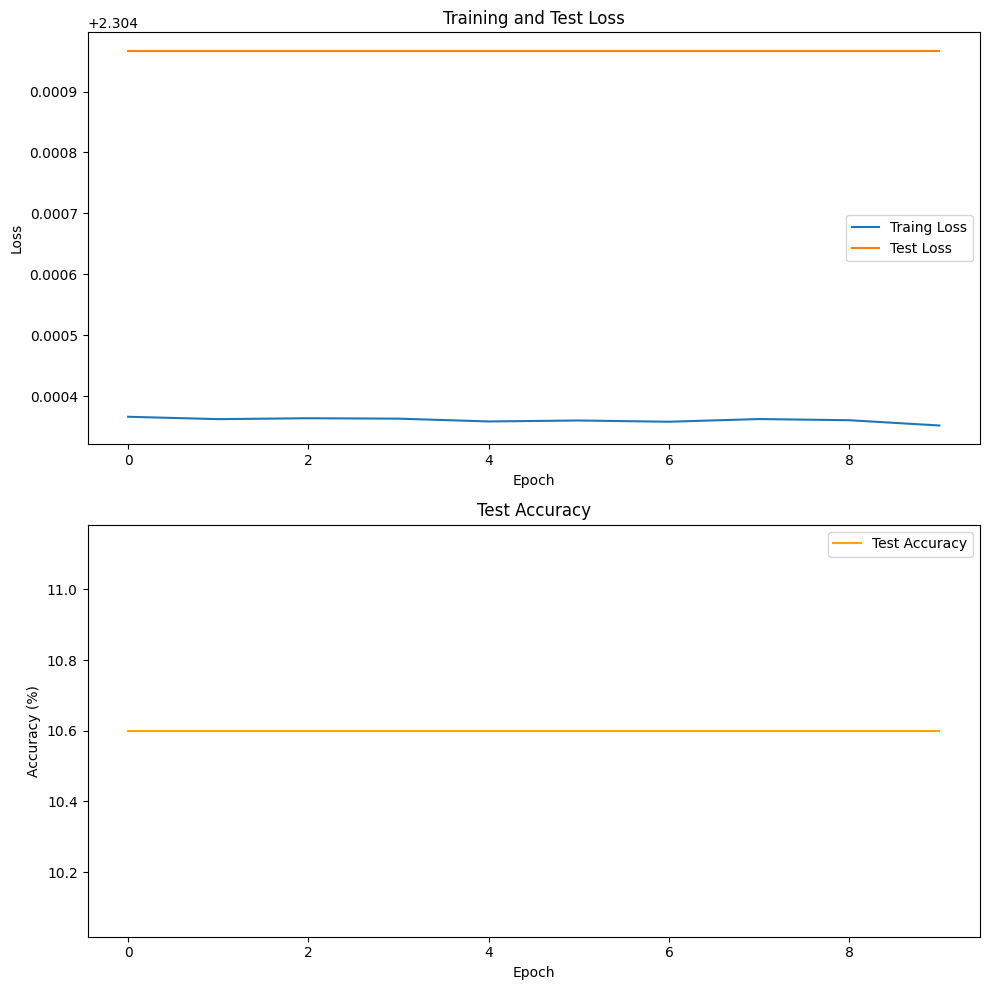

In [10]:
# 손실 및 정확도 시각화
fig, axs = plt.subplots(2, 1, figsize = (10, 10))
axs[0].plot(train_losses, label = 'Traing Loss')
axs[0].plot(test_losses, label = 'Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(test_accuracies, label = 'Test Accuracy', color = 'orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Test Accuracy')

plt.tight_layout()
plt.show()